<h2>folium</h2>

In [17]:
import gpxpy, folium

with open("activity_20802394121 (10K-Maipu).gpx", "r") as f:
    gpx = gpxpy.parse(f)

seg = gpx.tracks[0].segments[0]
coords = [(p.latitude, p.longitude) for p in seg.points]  # folium = (lat, lon)

m = folium.Map(location=coords[0], zoom_start=14)
folium.PolyLine(coords, weight=4, color="red").add_to(m)
folium.Marker(coords[0], tooltip="Inicio").add_to(m)
folium.Marker(coords[-1], tooltip="Fin").add_to(m)
m

<h2>receta completa con tu GPX</h2>

In [50]:
import gpxpy, folium
from folium.plugins import HeatMap, MarkerCluster

# 1) leer GPX
with open("activity_20802394121 (10K-Maipu).gpx", "r") as f:
    gpx = gpxpy.parse(f)
seg = gpx.tracks[0].segments[0]
coords = [(p.latitude, p.longitude) for p in seg.points]

# 2) mapa + grupos
m = folium.Map(location=coords[0], zoom_start=14, tiles="CartoDB positron")
folium.PolyLine(coords, weight=4, color="red").add_to(m)
folium.Marker(coords[0], tooltip="Inicio").add_to(m)
folium.Marker(coords[-1], tooltip="Fin").add_to(m)


# 3) ruta y marcadores
rutas = folium.FeatureGroup(name="Ruta 10K", show=True).add_to(m)
puntos = folium.FeatureGroup(name="Puntos de interés").add_to(m)

folium.PolyLine(coords, weight=4, color="#e62429").add_to(rutas)
folium.Marker(coords[0], tooltip="Inicio").add_to(rutas)
folium.Marker(coords[-1], tooltip="Fin").add_to(rutas)

folium.LayerControl(collapsed=False).add_to(m)


# 4) (opcional) cluster + heat
cluster = MarkerCluster(name="Marcadores").add_to(puntos)
for i, (la, lo) in enumerate(coords[::200]):  # muestreo cada 200 puntos
    folium.Marker([la, lo], popup=f"Km ~{i*0.2:.1f}").add_to(cluster)



m
# m.save("maipu_10k.html")


In [36]:
import gpxpy, folium
from folium.plugins import HeatMap, MarkerCluster

# 1) leer GPX
with open("activity_20802394121 (10K-Maipu).gpx", "r") as f:
    gpx = gpxpy.parse(f)
seg = gpx.tracks[0].segments[0]
coords = [(p.latitude, p.longitude) for p in seg.points]

# 2) mapa + grupos
m = folium.Map(location=coords[0], zoom_start=14, tiles="CartoDB positron")
rutas = folium.FeatureGroup(name="Ruta 10K", show=True).add_to(m)
puntos = folium.FeatureGroup(name="Puntos de interés").add_to(m)

# 3) ruta y marcadores
folium.PolyLine(coords, weight=4, color="#e62429").add_to(rutas)
folium.Marker(coords[0], tooltip="Inicio").add_to(rutas)
folium.Marker(coords[-1], tooltip="Fin").add_to(rutas)

# 4) (opcional) cluster + heat
cluster = MarkerCluster(name="Marcadores").add_to(puntos)
for i, (la, lo) in enumerate(coords[::200]):  # muestreo cada 200 puntos
    folium.Marker([la, lo], popup=f"Km ~{i*0.2:.1f}").add_to(cluster)
HeatMap(coords[::50], radius=10).add_to(puntos)

folium.LayerControl(collapsed=False).add_to(m)
m
# m.save("maipu_10k.html")


<h2>Mapa base</h2>

In [23]:
import folium

m = folium.Map(location=[-33.45, -70.66], zoom_start=12, tiles="OpenStreetMap")
# o "CartoDB positron", "Stamen Toner", "Stamen Terrain"
m.fit_bounds([[-33.60, -70.80], [-33.35, -70.55]])  # [S, W], [N, E]
m  # en notebook se ve directo
# m.save("mapa.html")


In [52]:
import gpxpy

with open("activity_20802394121 (10K-Maipu).gpx") as f:
    gpx = gpxpy.parse(f)

seg = gpx.tracks[0].segments[0]

coords = [(p.latitude, p.longitude) for p in seg.points]  # (lat, lon)


In [54]:
import pandas as pd

df_route = pd.DataFrame(coords, columns=["lat", "lon"])


<h2>plotly.express</h2>

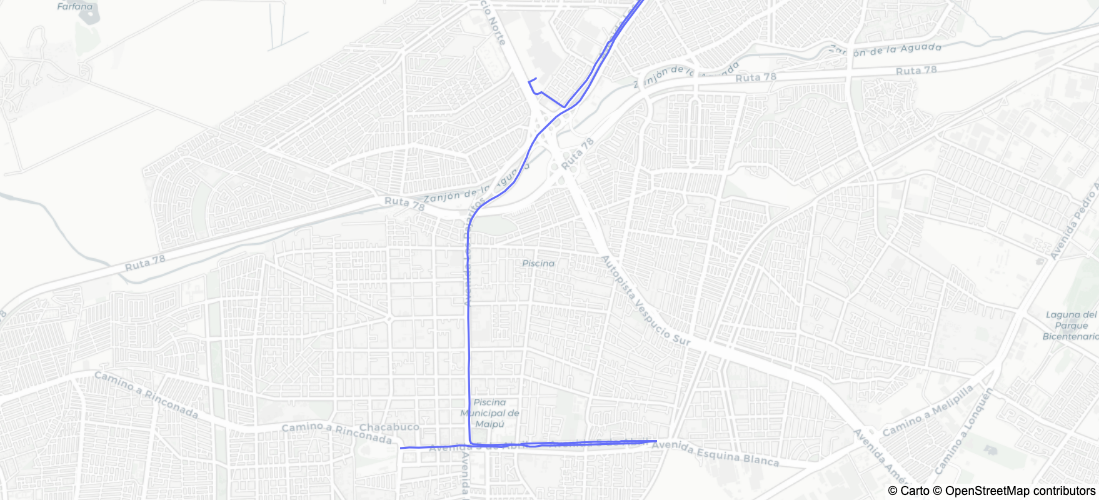

In [56]:
import plotly.express as px

fig = px.line_mapbox(
    df_route,
    lat="lat",
    lon="lon",
    zoom=13,
    height=500
)

fig.update_layout(mapbox_style="carto-positron")  # limpio, profesional
fig.update_layout(margin=dict(r=0, l=0, t=0, b=0))
fig.show()


In [70]:


df_points = pd.DataFrame([
    {"lat": df_route.lat.iloc[0], "lon": df_route.lon.iloc[0], "label": "Inicio"},
    {"lat": df_route.lat.iloc[-1], "lon": df_route.lon.iloc[-1], "label": "Fin"},
])

fig = px.line_mapbox(df_route, lat="lat", lon="lon", zoom=13, height=500)

fig.add_scattermapbox(
    lat=df_points.lat,
    lon=df_points.lon,
    text=df_points.label,
    mode="markers+text",
    textposition="top center",
    marker=dict(size=12, color=["green", "red"])
)

fig.update_layout(mapbox_style="carto-positron", margin=dict(r=0,l=0,t=0,b=0))
#fig.update_layout(mapbox_style="open-street-map")
fig.show()


In [74]:
import gpxpy, pandas as pd, numpy as np, plotly.express as px

# 1) Leer la actividad GPX
with open("activity_20802394121 (10K-Maipu).gpx") as f:
    gpx = gpxpy.parse(f)

seg = gpx.tracks[0].segments[0]
coords = [(p.latitude, p.longitude) for p in seg.points]

# 2) DataFrame base
df = pd.DataFrame(coords, columns=["lat", "lon"])

# 3) Crear la figura con una sola línea limpia
fig = px.line_mapbox(
    df,
    lat="lat",
    lon="lon",
    height=550,
    zoom=13
)

fig.update_traces(line=dict(width=5, color="#0057b8"), hoverinfo="skip")

# 4) Marcar inicio y fin
df_points = pd.DataFrame([
    {"lat": df.lat.iloc[0], "lon": df.lon.iloc[0], "label": "Inicio"},
    {"lat": df.lat.iloc[-1], "lon": df.lon.iloc[-1], "label": "Fin"},
])

fig.add_scattermapbox(
    lat=df_points.lat,
    lon=df_points.lon,
    mode="markers+text",
    text=df_points.label,
    textposition="bottom right",
    marker=dict(size=14, color=["green","red"])
)

# 5) Usar estilo sin token (esto elimina el error rosado)
fig.update_layout(
    mapbox_style="open-street-map",
    margin=dict(l=0, r=0, t=0, b=0),
    showlegend=False
)

fig.show()



In [1]:
import geopandas as gpd
from shapely.geometry import LineString

print(gpd.__version__)    # debe mostrar 0.14.4


0.14.4


<h2>GEOPANDA</h2>

In [16]:
import gpxpy, geopandas as gpd
from shapely.geometry import LineString, Point

# 1) Leer GPX
with open("activity_20802394121 (10K-Maipu).gpx", "r") as f:
    gpx = gpxpy.parse(f)

seg = gpx.tracks[0].segments[0]

# 2) Coordenadas para Shapely/GeoPandas  👉 (lon, lat)
coords_line = [(p.longitude, p.latitude) for p in seg.points]

# 3) GeoDataFrames: línea + puntos inicio/fin
gdf_line  = gpd.GeoDataFrame({"name": ["Ruta 10K"]},
                             geometry=[LineString(coords_line)], crs="EPSG:4326")

gdf_start = gpd.GeoDataFrame({"label": ["Inicio"]},
                             geometry=[Point(coords_line[0])], crs="EPSG:4326")

gdf_end   = gpd.GeoDataFrame({"label": ["Fin"]},
                             geometry=[Point(coords_line[-1])], crs="EPSG:4326")

# 4) Mapa interactivo (GeoPandas .explore usa Folium por debajo)
m = gdf_line.explore(
    tiles="CartoDB positron",              # fondo limpio
    style_kwds={"color": "red", "weight": 4},
    tooltip=["name"]
)

# Capas para Inicio/Fin (colores distintos)
gdf_start.explore(
    m=m,
    marker_type="marker",
    tooltip=["label"],
    popup=["label"],
    marker_kwds={"radius": 8, "fill": True, "color": "green"}
)

gdf_end.explore(
    m=m,
    marker_type="marker",
    tooltip=["label"],
    popup=["label"],
    marker_kwds={"radius": 8, "fill": True, "color": "red"}
)


m  # se renderiza en el notebook; m.save("10k_geopandas.html") para exportar
